In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from imblearn.over_sampling import SMOTE

% matplotlib inline

In [2]:
# Load data
train_df = pd.read_csv("~/real_estate/data/v2/train_df_pca.csv")

dbscan_features = train_df.columns[:-1]
smote_features = train_df.columns

In [3]:
smote_features

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', 'target'],
      dtype='object')

In [3]:
scaled_target = (train_df["target"].values - min(train_df["target"]))/(
    max(train_df["target"]) - min(train_df["target"]))

target_groups = []

for i in scaled_target:
    target = int(np.floor(i*30))
    target_groups.append(target)

In [5]:
indices_first = [i for i, x in enumerate(target_groups) if x in [0,1]]
indices_last = [i for i, x in enumerate(target_groups) if x in 
                [24,25,26,27,28,29,30]]

for i in indices_first:
    target_groups[i] = 2
for i in indices_last:
    target_groups[i] = 23

In [6]:
smote = SMOTE(ratio="minority", random_state=42, k_neighbors=5)
X_res, y_res = smote.fit_sample(train_df[smote_features].values, 
                                target_groups)
for i in range(21):
    X_res, y_res = smote.fit_sample(X_res, y_res)

In [7]:
X_res = pd.DataFrame(X_res, columns=smote_features)

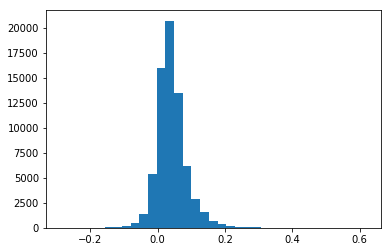

In [8]:
plt.hist(train_df["target"], bins=35)
plt.show()

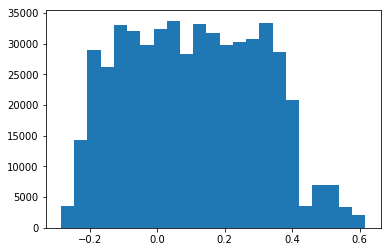

In [9]:
plt.hist(X_res["target"], bins=23)
plt.show()

In [12]:
X_res.to_csv("~/real_estate/data/v2/train_df_smote.csv", index=False)